In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
df = pd.read_csv('/content/honeyproduction 1998-2021.csv')

In [45]:
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


<b><font color = 'red'>state</font></b>: Various states of the U.S.<br>
<b><font color = 'red'>numcol</font></b>: Number of honey-producing colonies. Honey producing colonies
are the maximum number of colonies from which honey was taken during
the year. It is possible to take honey from colonies that did not survive the
entire year<br>
<b><font color = 'red'>yieldpercol</font></b>: Honey yield per colony. Unit is pounds<br>
<b><font color = 'red'>totalprod</font></b>: Total production (numcol x yieldpercol). Unit is pounds<br>
<b><font color = 'red'>stocks</font></b>: Refers to stocks held by producers. Unit is pounds<br>
<b><font color = 'red'>priceperlb</font></b>: Refers to average price per pound based on expanded sales. The
unit is dollars.<br>
<b><font color = 'red'>prodvalue</font></b>: Value of production (totalprod x priceperlb). The unit is dollars.<br>
<b><font color = 'red'>year</font></b>: Year of production


In [46]:
df.shape

(985, 8)

In [47]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [48]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,985.000000,985.000000,9.850000e+02,9.850000e+02,985.000000,9.850000e+02,985.000000
mean,62892.385787,58.402030,4.035132e+06,1.167187e+06,1.969594,5.939911e+06,2009.291371
std,94163.791917,19.291695,6.752290e+06,2.088589e+06,1.177922,9.806595e+06,6.962251
min,2000.000000,3.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,45.000000,4.690000e+05,1.080000e+05,1.200000,1.037000e+06,2003.000000
50%,26000.000000,55.000000,1.488000e+06,3.600000e+05,1.700000,2.409000e+06,2009.000000
75%,68000.000000,70.000000,3.780000e+06,1.217000e+06,2.360000,5.897000e+06,2015.000000
max,530000.000000,136.000000,4.641000e+07,1.380000e+07,8.230000,8.385900e+07,2021.000000


In [49]:
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

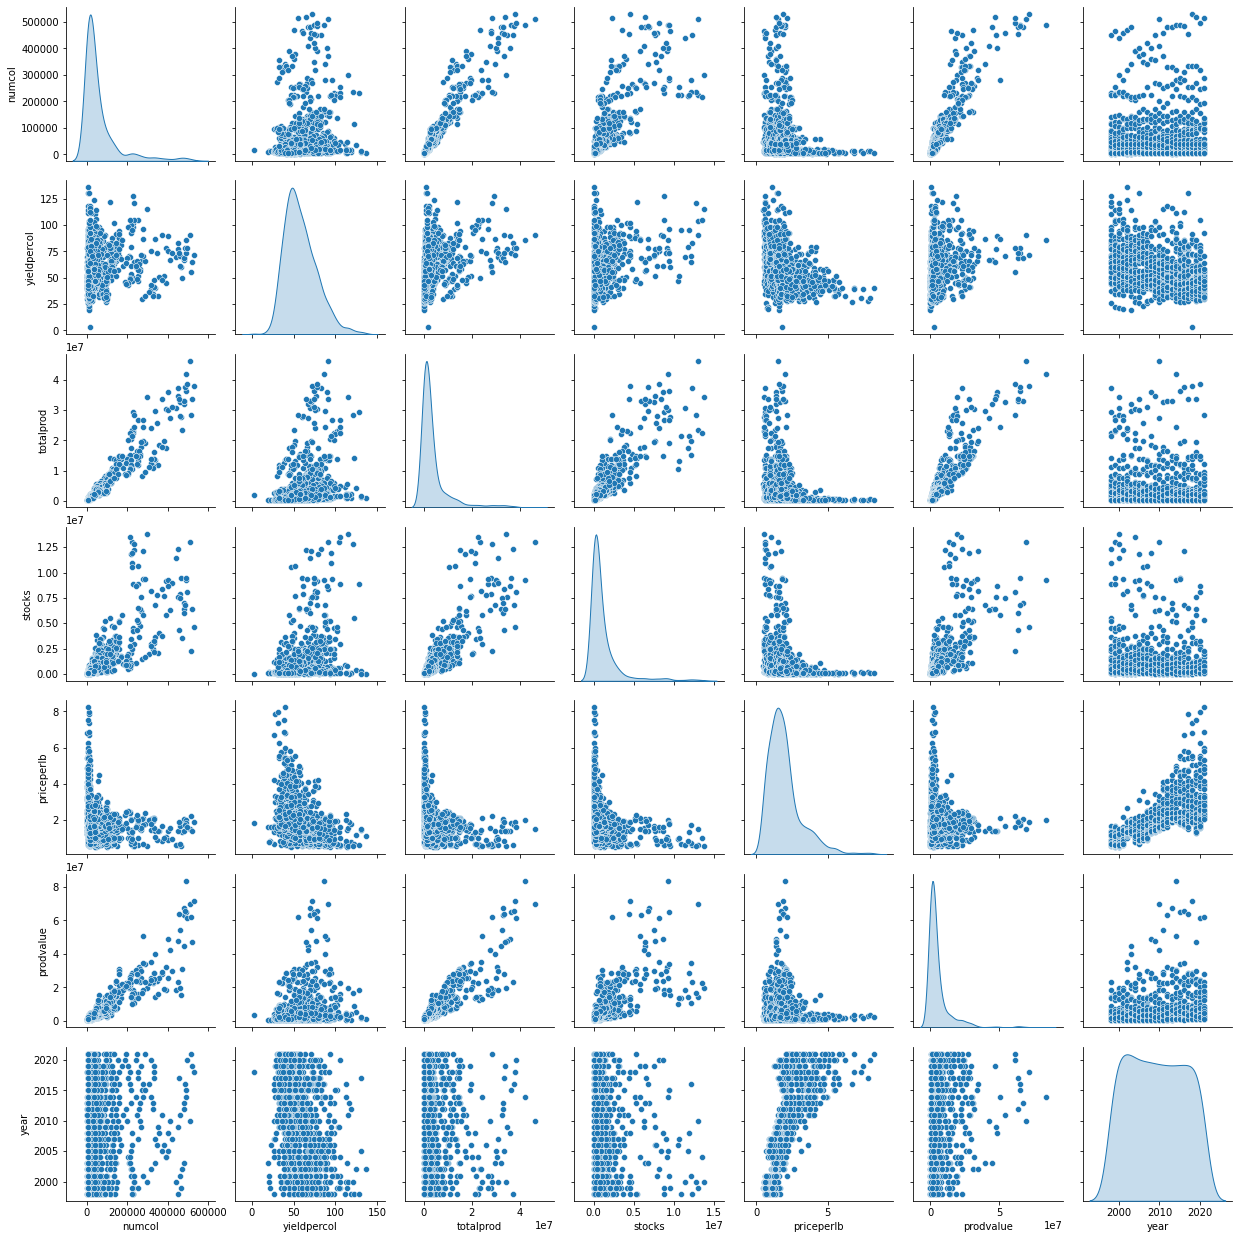

In [50]:
sns.pairplot(df, diag_kind="kde");

In [51]:
correlation = df.corr()
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.198576,0.949640,0.796897,-0.223360,0.912601,0.034365
yieldpercol,0.198576,1.000000,0.364392,0.356294,-0.398247,0.224704,-0.318318
totalprod,0.949640,0.364392,1.000000,0.864333,-0.252678,0.900720,-0.048837
stocks,0.796897,0.356294,0.864333,1.000000,-0.284894,0.693372,-0.137590
priceperlb,-0.223360,-0.398247,-0.252678,-0.284894,1.000000,-0.088529,0.694738
prodvalue,0.912601,0.224704,0.900720,0.693372,-0.088529,1.000000,0.178040
year,0.034365,-0.318318,-0.048837,-0.137590,0.694738,0.178040,1.000000


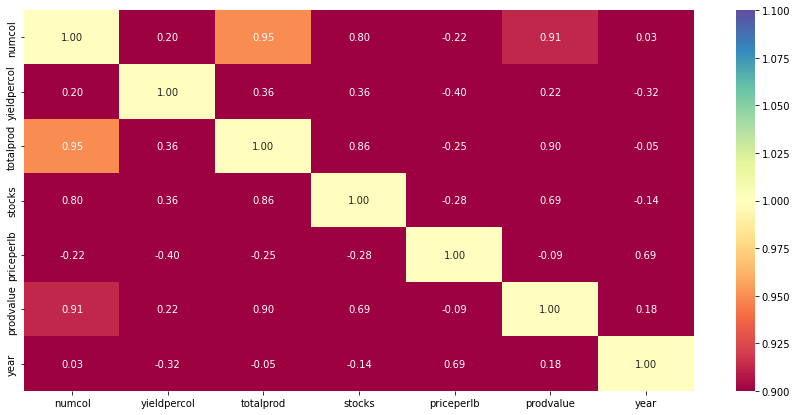

In [52]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

# Q1. How has honey production yield changed from 1998 to 2021?


In [53]:
#grouping data to answer questions

yield_ = df['yieldpercol'].groupby(by=df['year']).sum() 
yield_.head()    

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

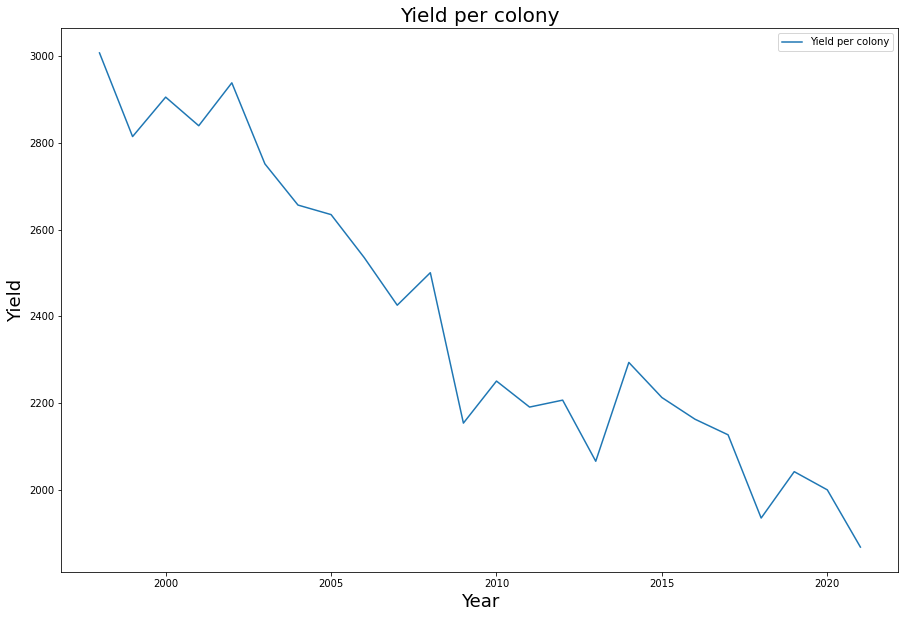

In [54]:
# Plotting grouped data

plt.figure(figsize=(15,10))
sns.lineplot(x=yield_.index,y=yield_.values,label='Yield per colony')
plt.title("Yield per colony", size=20)
plt.xlabel("Year", size=18)
plt.ylabel("Yield", size = 18)
plt.show()

# Q2. Over time, what are the major production trends across the states?


In [55]:
df.head(2)

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


In [56]:
state = df['totalprod'].groupby(by=df['State'], axis=0, sort=False).sum().sort_values(ascending=False)
state.head()

State
North Dakota    797000000.0
California      457195000.0
South Dakota    417516000.0
Florida         343697000.0
Montana         265742000.0
Name: totalprod, dtype: float64

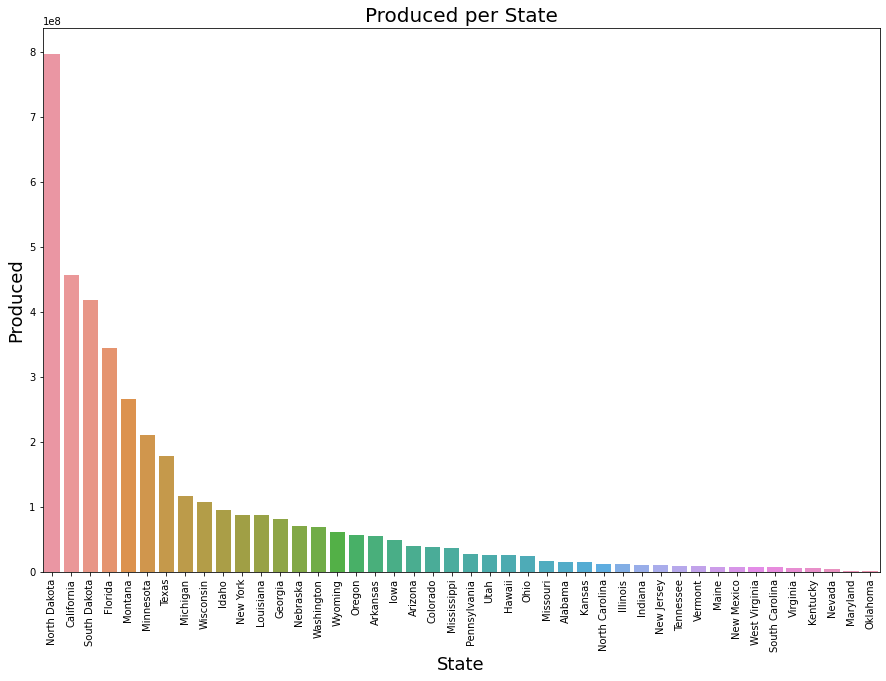

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x=state.index,y=state.values) ## Barplot is useful, when we have categories, such as state
plt.title("Produced per State", size=20)
plt.xlabel("State", size=18)
plt.ylabel("Produced", size = 18)
plt.xticks(rotation=90)
plt.show()

### 1998 total prod by state

In [58]:
state1998 = df['totalprod'].groupby(by=df['State'].loc[df['year']==1998], axis=0).sum()
state_1998 = pd.DataFrame({'states':state1998.index,'Total_Produced_1998':state1998.values})
## Grouping the data and creating a dataframe with it!
state_1998.tail(10)

,states,Total_Produced_1998
33,South Dakota,21375000.0
34,Tennessee,448000.0
35,Texas,7007000.0
36,Utah,1740000.0
37,Vermont,384000.0
38,Virginia,296000.0
39,Washington,2958000.0
40,West Virginia,330000.0
41,Wisconsin,8099000.0
42,Wyoming,2760000.0


### 2012 total prod by state

In [59]:
state2012 = df['totalprod'].groupby(by=df['State'].loc[df['year']==2012], axis=0).sum() 
state_2012 = pd.DataFrame({'states':state2012.index,'Total_Produced_2012':state2012.values})
## Grouping the data and creating a dataframe with it!
state_2012.tail(10)

,states,Total_Produced_2012
30,South Dakota,16380000.0
31,Tennessee,366000.0
32,Texas,4784000.0
33,Utah,950000.0
34,Vermont,240000.0
35,Virginia,164000.0
36,Washington,2542000.0
37,West Virginia,288000.0
38,Wisconsin,4140000.0
39,Wyoming,2550000.0


In [60]:
print(state_1998.value_counts().sum())
print(state_2012.value_counts().sum())

43
40


We see that there are missing states in 2012 dataset, maybed they stopped producing honey. We'll try to add them and sort by state again. We'll add these states with a value of 0.

In [62]:
## Checking states in each dataset
print(state_1998['states'].unique())
print(state_2012['states'].unique())

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oregon' 'Pennsylvania'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


This 3 States (Michigan Nevada Oklahoma) are missing from 2012.

In [63]:
## Adding the missing states to the 2012 dataset

missing = pd.DataFrame({'states':['Michigan','Nevada', 'Oklahoma'], 'Total_Produced_2012':[0,0,0]})
state_2012 = state_2012.append(missing, ignore_index=True)
state_2012.tail(10)

,states,Total_Produced_2012
33,Utah,950000.0
34,Vermont,240000.0
35,Virginia,164000.0
36,Washington,2542000.0
37,West Virginia,288000.0
38,Wisconsin,4140000.0
39,Wyoming,2550000.0
40,Michigan,0.0
41,Nevada,0.0
42,Oklahoma,0.0


In [64]:
print(state_1998.value_counts().sum())
print(state_2012.value_counts().sum())

43
43


#Which have experienced the most change in honey yield?

In [68]:
merge_df = pd.merge(state_1998,state_2012,on = 'states')

In [69]:
merge_df.head(10)

,states,Total_Produced_1998,Total_Produced_2012
0,Alabama,1136000.0,432000.0
1,Arizona,3300000.0,1012000.0
2,Arkansas,3445000.0,1575000.0
3,California,37350000.0,11550000.0
4,Colorado,1944000.0,1200000.0
5,Florida,22540000.0,12352000.0
6,Georgia,4200000.0,3009000.0
7,Hawaii,944000.0,750000.0
8,Idaho,6000000.0,2944000.0
9,Illinois,639000.0,427000.0


In [70]:
merge_df['Changes'] = merge_df['Total_Produced_1998'] - merge_df['Total_Produced_2012']

In [71]:
merge_df.head(10)

,states,Total_Produced_1998,Total_Produced_2012,Changes
0,Alabama,1136000.0,432000.0,704000.0
1,Arizona,3300000.0,1012000.0,2288000.0
2,Arkansas,3445000.0,1575000.0,1870000.0
3,California,37350000.0,11550000.0,25800000.0
4,Colorado,1944000.0,1200000.0,744000.0
5,Florida,22540000.0,12352000.0,10188000.0
6,Georgia,4200000.0,3009000.0,1191000.0
7,Hawaii,944000.0,750000.0,194000.0
8,Idaho,6000000.0,2944000.0,3056000.0
9,Illinois,639000.0,427000.0,212000.0


In [74]:
min_v = merge_df.Changes.min()

In [87]:
min = merge_df[merge_df['Changes']==min_v]

In [88]:
min

,states,Total_Produced_1998,Total_Produced_2012,Changes
28,North Dakota,29440000.0,33120000.0,-3680000.0


The state with most honey production change is North Dakota with a decrease of -3680000.0 production

# Q3. Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

For this, we'll need to plot from 1998 to 2006. That's easy, we group the data for all years before 2007

In [102]:
yield_2006 = df['yieldpercol'].loc[df['year']<2007].groupby(by=df['year']).sum() 
yield_2006.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

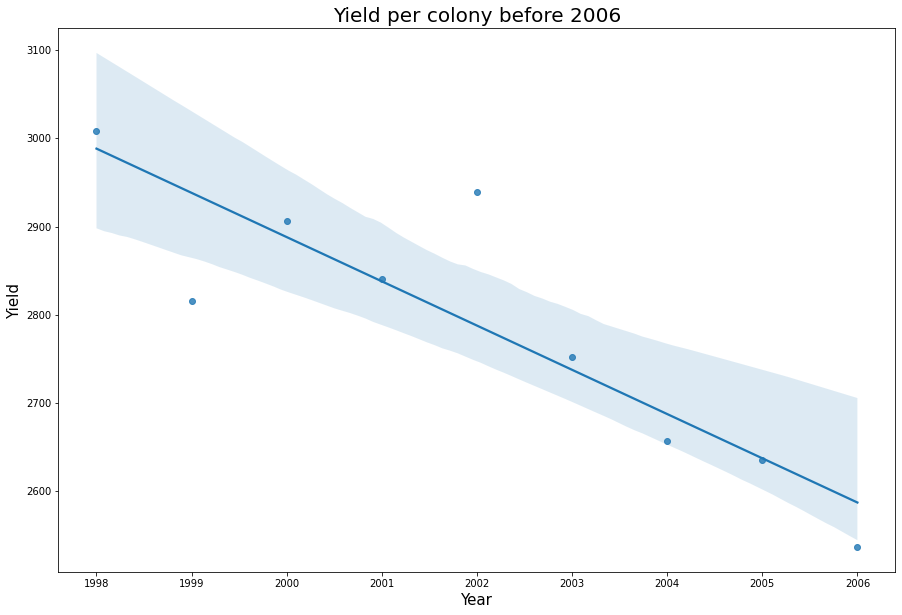

In [103]:
plt.figure(figsize=(15,10))
sns.regplot(x=yield_2006.index,y=yield_2006.values)
plt.title("Yield per colony before 2006", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Yield", size = 15)
plt.show()

There's a strong tendency of decrease, this can be seen by plotting the data point and fitting a linear regression in it with seaborn regplot.

# Q4. Are there any patterns that can be observed between total honey production and value of production every year?

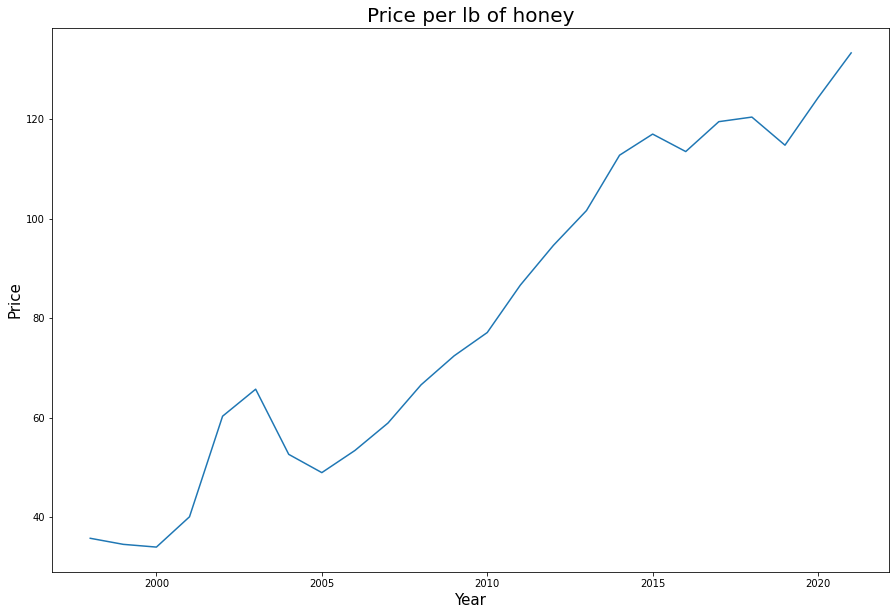

In [104]:
plt.figure(figsize=(15,10))
plt.plot(df['priceperlb'].groupby(by=df['year']).sum())
plt.title("Price per lb of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)
plt.show()

<font color ='red'>We saw that the production is decreasing year by year,if the demand remain same,then price will hike year by year because of low production of honey.This can be seen in the above chart.</font>

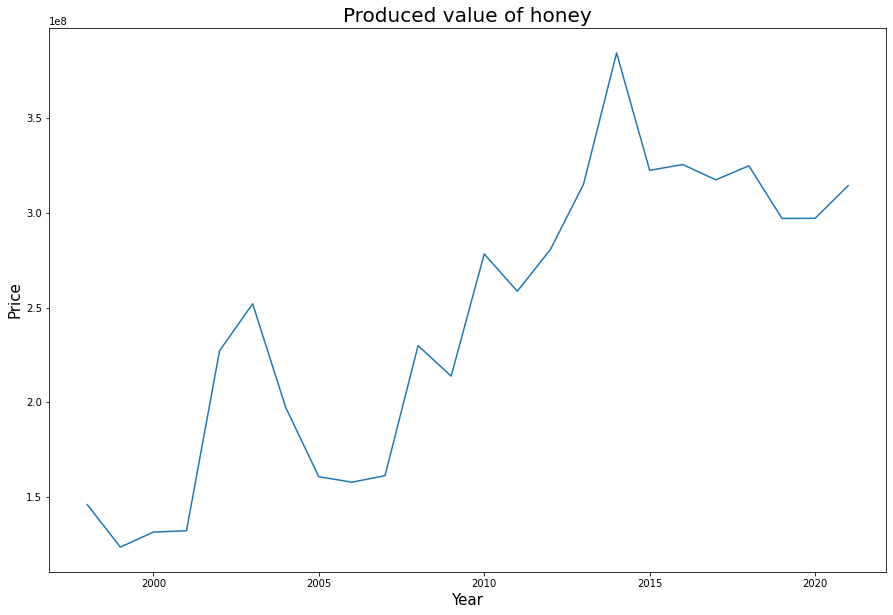

In [105]:
plt.figure(figsize=(15,10))
plt.plot(df['prodvalue'].groupby(by=df['year']).sum())
plt.title("Produced value of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)
plt.show()

We see that the produced value is tied with the Yield per colony and the price per lb. When there's a decrease in Yield, but a increse in price, the price will adjust. For example, let's look into the years 2001-2003 and 2003-2005.

From 2001-2003, there was a huge increase in value. We didn't see a significant decrease in Yield, but the price skyrocket!

From 2003-2005, the price decrease (not to the same level of 2001), as well as the yield, so the produced value decrease a lot.

During the next years, we see a continous decrease of yield and a continuous increase in price per lb, but the tendency of the produced value is to always increase.

In [108]:
px.scatter(df, x = 'numcol', y = 'prodvalue', animation_frame = 'year', size = 'totalprod')